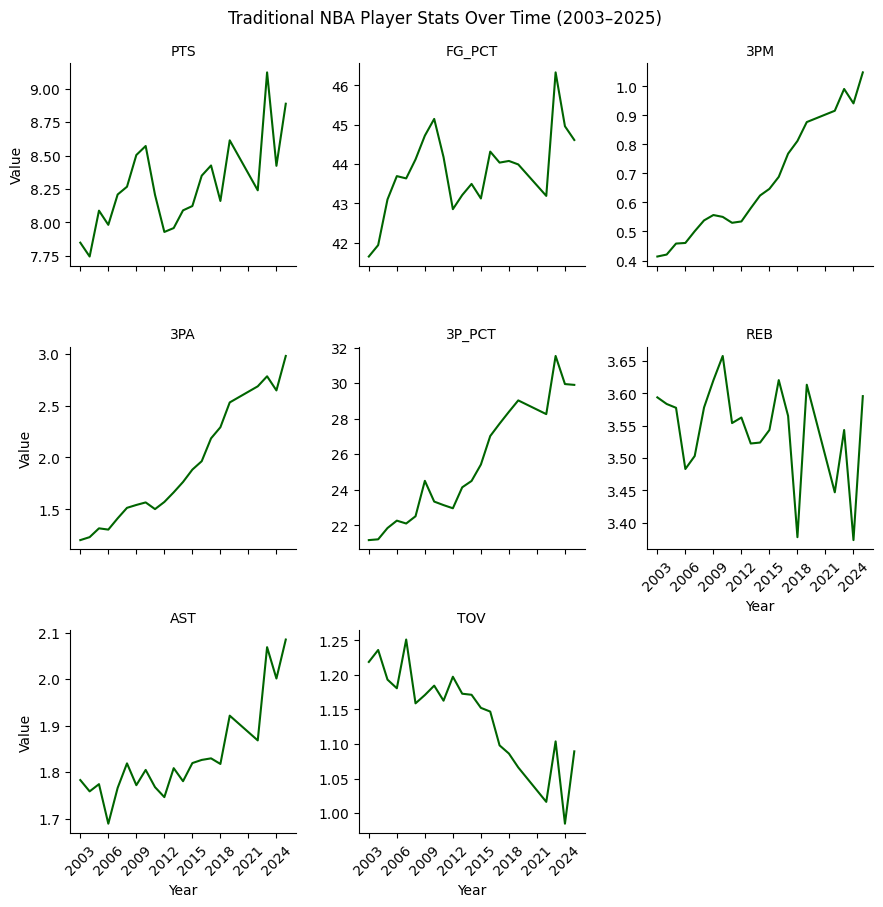

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load player data
df = pd.read_csv("/workspaces/Data-Science-Final-Project/NBA/data/official_player_traditional_stats.csv")
df['Year'] = df['YEAR'].astype(int)

# Select traditional stats of interest
trad_stats = ['PTS', 'FG_PCT', '3PM', '3PA', '3P_PCT', 'REB', 'AST', 'TOV']

# Group by year (league-wide player averages)
league_avg = df.groupby('Year')[trad_stats].mean().reset_index()

# Melt for faceting
melted = league_avg.melt(id_vars='Year', var_name='Stat', value_name='Value')

# Faceted plot
g = sns.FacetGrid(melted, col='Stat', col_wrap=3, height=3, sharey=False)
g.map(sns.lineplot, 'Year', 'Value', color='darkgreen')

# Set titles and spacing
g.set_titles("{col_name}")
g.figure.subplots_adjust(top=0.92, hspace=0.4)
g.figure.suptitle('Traditional NBA Player Stats Over Time (2003–2025)')

# Rotate x-axis and set fixed ticks
xticks = np.arange(2003, 2026, 3)
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)
    ax.set_xticks(xticks)

plt.show()
